In [114]:
##Importing the libraries used
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import re

In [115]:
## Reading the dataset
df = pd.read_csv('../survey_results_public.csv')

In [116]:
df.shape
## data has 88883 rows and 85 columns

(88883, 85)

### Data Preparation

In [117]:

## Regex to filter Data professionals, less than 1 year  of professional coding experience
junior_data = df[(df['YearsCodePro']=='Less than 1 year')&
                 (df['DevType'].str.contains("data\s|\sdata$|\sdata\s",
                                             flags=re.IGNORECASE,regex=True).fillna(value=False))]

In [118]:
senior_data = df[~(df['YearsCodePro']=='Less than 1 year')&
                 ~(df['DevType'].str.contains("data\s|\sdata$|\sdata\s",
                                              flags=re.IGNORECASE,regex=True).fillna(value=False))]

In [119]:
## list of possible values of 'DevType'- developer type
possible_vals = ['Academic researcher','Data or business analyst',
                 'Data scientist or machine learning specialist','Database administrator',
                 'Designer','Developer, back-end','Developer, desktop or enterprise applications',
                 'Developer, embedded applications or devices','Developer, front-end',
                 'Developer, full-stack','Developer, game or graphics Developer, mobile',
                 'Developer, QA or test','DevOps specialist','Educator','Engineer, data',
                 'Engineer, site reliability','Engineering manager','Marketing or sales professional',
                 'Product manager','Scientist','Senior Executive (C-Suite, VP, etc.)',
                 'Student','System administrator','Other']

In [120]:
## Function that returns the count of each values in the list of interest
def total_count(df,col1,col2,lookfor):
    '''
    Returns a dataframe with the count of values in the input dataframe for the corresponding value
    in the lookfor list.
    
    Parameters: 
        df(dataframe): Input dataframe from the raw response data; a single respondent might have more than 
        one response separated by a semi-colon.
        col1: The first column in the df dataframe which contains the response.
        col2: The second column in the df dataframe which containes the count; number of times that response
        was found in the dataframe.
        lookfor(list): Contains the list of possible values of the responses.
        
    Returns: The function returns a dataframe with number of times each responses in the 'lookfor' list
    appeared in the input dataframe 'df'.
    
    '''
    
    new_df = defaultdict(int)
    for val in lookfor:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val]+= int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1,col2]
    new_df.sort_values('Count',ascending = False, inplace = True)
    return new_df

#### Dataframe to represent the value counts of 'DeveTypes'

In [121]:
datatype = junior_data['DevType'].value_counts().reset_index()
datatype.rename(columns = {'index':'DevType','DevType':'Count'},inplace=True)
datatype_df = total_count(datatype,'DevType','Count',possible_vals)

In [122]:
## Adding percentage of each roles present
datatype_df['perc'] = datatype_df['Count']/558

### Analysis

### Who are these Junior Data Professionals?

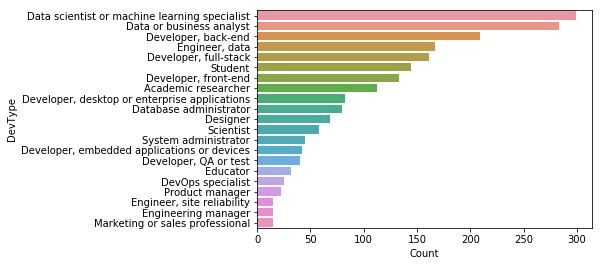

In [123]:
sns.barplot(x= datatype_df['Count'], y= datatype_df['DevType'])

#### Majority of them identify themselves as DataScientist or Machine Learning Specialist which is about 54 percent. About 51 percent as Data or Business Analyst. About 2 pecent of the respondents also identifed themselves as Marketing or Sales professional  and was the lowest among the responses. 

### Does the Junior Data Professional work longer on average compared to the total average number of working hours per week?

In [124]:
## mean hours for a junior data pro
junior_data['WorkWeekHrs'].mean()

38.86727688787185

In [125]:
## mean hours for a senior data pro
senior_data['WorkWeekHrs'].mean()

42.15981877335889

On average Junior Data Professional works 3.25 hours less than the general average

### What is the average salary of a Junior Data Professional?

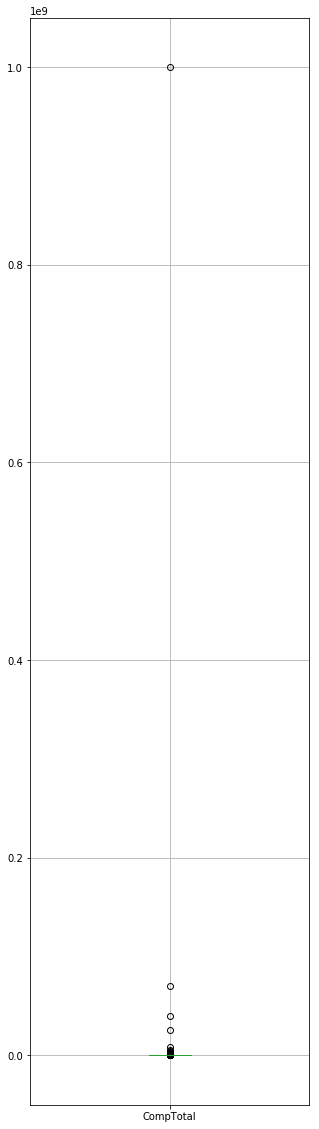

In [126]:
## Box plot reveals the skew and outliers
junior_data.boxplot(column ='CompTotal',figsize=(5,20))

In [127]:
## Mean value of tge Total Compensation
junior_data['CompTotal'].mean()

3192505.914438503

In [128]:
## Median Value
junior_data['CompTotal'].median()

37400.0

In [129]:
## Max value of Total Compensation
junior_data['CompTotal'].max()

1000000000.0

In [130]:
## using median to fill the na values, median is used due to skew in data with 
## high values. Using median is better in the cases with highly skewed data as it
## can represent the central tendancy better and is not affected by the skew.
junior_data.loc[:,'CompTotal'] = junior_data['CompTotal'].fillna(junior_data['CompTotal'].median())

/Users/kavitasreejithpillai/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [131]:
## creating dataframe without outliers for Total Compensation
junior_data_CompTotal_out = junior_data[junior_data['CompTotal']
                                        .between(junior_data['CompTotal'].quantile(.15), 
                                                 junior_data['CompTotal'].quantile(.75))]

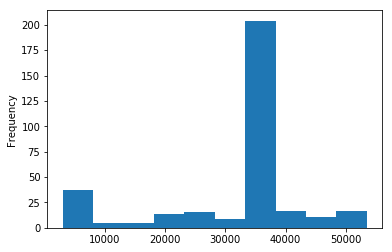

In [132]:
## Distribution the total compensation variable
junior_data_CompTotal_out['CompTotal'].plot(kind='hist')

In [133]:
## list of all possible values for LanguagesWorkedWith variable
possible_vals_tech = ['Assembly','Bash/Shell/PowerShell', 'C','C++','C#','Clojure Dart Elixir Erlang','F#',
                      'Go','HTML/CSS','Java','JavaScript','Kotlin','Objective-C','PHP',
                      'Python','R','Ruby','Rust','Scala','SQL','Swift','TypeScript','VBA','WebAssembly']

In [134]:
techtype = junior_data_CompTotal_out['LanguageWorkedWith'].value_counts().reset_index()

In [135]:
techtype.rename(columns = {'index':'skill','LanguageWorkedWith':'Count'},inplace=True)

In [136]:
tech_df = total_count(techtype,'skill','Count',possible_vals_tech)

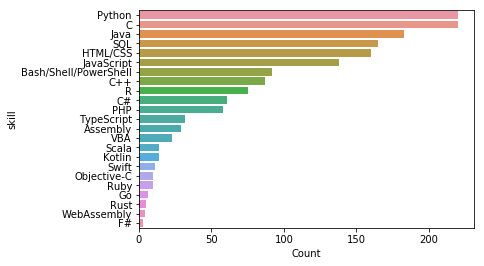

In [137]:
## Bar char to represent the skill sets
sns.barplot(x= tech_df['Count'], y= tech_df['skill'])

In [138]:
junior_data_CompTotal_out_high = junior_data_CompTotal_out[junior_data_CompTotal_out['CompTotal']>35000]

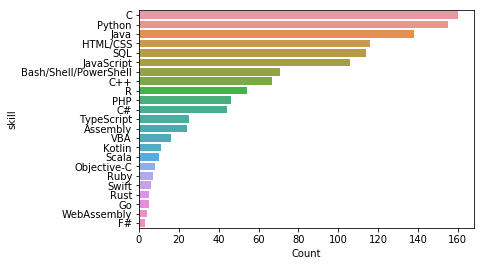

In [139]:
techtype_top_comp = junior_data_CompTotal_out_high['LanguageWorkedWith'].value_counts().reset_index()
techtype_top_comp.rename(columns = {'index':'skill','LanguageWorkedWith':'Count'},inplace=True)
top_comp_df = total_count(techtype_top_comp,'skill','Count',possible_vals_tech)
sns.barplot(x= top_comp_df['Count'], y= top_comp_df['skill'])

### How many years of code experience Junior data professional had?

In [140]:
junior_data_CompTotal_out['YearsCode'].value_counts()/junior_data_CompTotal_out.shape[0]

2                   0.143284
Less than 1 year    0.137313
5                   0.128358
3                   0.122388
4                   0.113433
6                   0.092537
1                   0.083582
8                   0.047761
7                   0.038806
10                  0.035821
9                   0.020896
13                  0.008955
14                  0.005970
20                  0.002985
35                  0.002985
30                  0.002985
24                  0.002985
12                  0.002985
19                  0.002985
15                  0.002985
Name: YearsCode, dtype: float64

In [141]:
0.165179+0.120536+0.120536+0.107143+0.102679+0.093750

0.709823

#### About 71 percent of the respondents had 1-6 years of coding experience